<a href="https://colab.research.google.com/github/ThousandAI/Application-of-AI/blob/main/class06/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Convolutional AutoEncoder**

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

# device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
BATCH_SIZE = 64
num_classes = 10
epochs = 10
learning_rate = 1e-4 # 0.0001

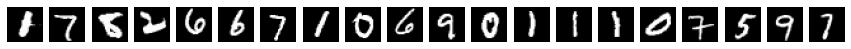

In [3]:
# Dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size = BATCH_SIZE, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size = BATCH_SIZE, shuffle = False)
iterator = iter(train_loader)
images, labels = next(iterator)
fig, axes = plt.subplots(1,20, figsize=(15, 15))
for i in range(20):
  axes[i].imshow(images[i][0], cmap = 'gray')
  axes[i].set_axis_off()
fig.show()

In [4]:
class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder, self).__init__()
    self.encoder = encoder
    self.decoder = decoder
  def forward(self, x):
    x = self.encoder(x)
    output = self.decoder(x)
    return output

In [5]:
class Encoder(nn.Module):
  def __init__(self):
    super(Encoder, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1) 
    self.conv2 = nn.Conv2d(in_channels=16, out_channels=4, kernel_size=3, stride=1, padding=1)
    self.pool = nn.MaxPool2d(2, 2)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool(x)
    x = F.relu(self.conv2(x))
    output = self.pool(x)
    return output

In [6]:
class Decoder(nn.Module):
  def __init__(self):
    super(Decoder, self).__init__()
    self.conv_t1 = nn.ConvTranspose2d(in_channels=4, out_channels=16, kernel_size=4, stride=2, padding=1) 
    self.conv_t2 = nn.ConvTranspose2d(in_channels=16, out_channels=1, kernel_size=4, stride=2, padding=1) 

  def forward(self, x):
    x = F.relu(self.conv_t1(x))
    output = torch.sigmoid(self.conv_t2(x))

    
    return output

In [7]:
encoder = Encoder()
decoder = Decoder()
ae = Autoencoder().to(device)

In [8]:
print(ae)

Autoencoder(
  (encoder): Encoder(
    (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Decoder(
    (conv_t1): ConvTranspose2d(4, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (conv_t2): ConvTranspose2d(16, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  )
)


In [9]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(ae.parameters(), lr=learning_rate)

In [10]:
total_steps = len(train_loader)
for epoch in range(epochs):
  train_loss = 0.0
  for i, (images, _ ) in enumerate(train_loader):
    images = images.to(device)
    # Forward pass
    outputs = ae(images)
    loss = criterion(outputs, images)
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss += loss.item()
  print(f'Epoch {epoch+1}, Loss: {train_loss/total_steps:.4f}')

Epoch 1, Loss: 0.1111
Epoch 2, Loss: 0.0292
Epoch 3, Loss: 0.0165
Epoch 4, Loss: 0.0125
Epoch 5, Loss: 0.0104
Epoch 6, Loss: 0.0091
Epoch 7, Loss: 0.0083
Epoch 8, Loss: 0.0077
Epoch 9, Loss: 0.0073
Epoch 10, Loss: 0.0070


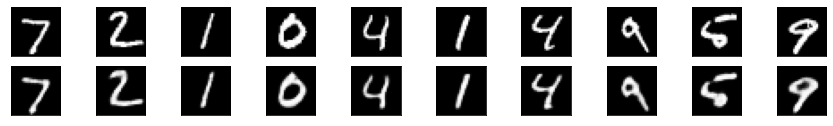

In [11]:
dataiter = iter(test_loader)
images, labels = dataiter.next()
images = images.to(device)
output = ae(images)
images = images.cpu().numpy()
output = output.detach().cpu().numpy()


fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(15,2))

# input images on top row, reconstructions on bottom
for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)